<a href="https://colab.research.google.com/github/vilsonrodrigues/playing-with-falcon/blob/main/notebooks/nm_vllm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sparse Models with Neural Magic 🧙**

## **Infos**

The core idea behind sparse models is reduce memory-usage by ml models through weights pruning

The Marlin Kernel accelerates inference over GPTQ using INT4 kernel. GPTQ is an algorithm to convert 16-bits weights to 4-bits. Quantizing reduces the model's precision from FP16 to INT4 which effectively reduces the file size by ~70%. The main benefits are lower latency and memory usage.

NM-vLLM is a fork built over vLLM a fast LLM inference server

A collection of sparse models in HF Hub by NeuralMagic: https://huggingface.co/collections/neuralmagic/compressed-llms-for-nm-vllm-65e73e3d51d3200e34b77431

Notebook based-on https://neuralmagic.com/blog/bringing-the-neural-magic-to-gpus/

nm-vllm supports many Hugging Face models out of the box, whether compressed or not. Some architectures of note are:

- GPT-2 (`gpt2`)
- GPT BigCode (`bigcode/starcoder`)
- GPT-J (`EleutherAI/gpt-j-6b`)
- GPT-NeoX (`EleutherAI/gpt-neox-20b`)
- LLaMA & LLaMA-2 (`meta-llama/Llama-2-70b-chat-hf`)
- Mistral (`mistralai/Mistral-7B-Instruct-v0.1`)
- Mixtral (`mistralai/Mixtral-8x7B-Instruct-v0.1`)
- MPT (`mosaicml/mpt-7b`)
- OPT (`facebook/opt-66b`,)
- Phi (`microsoft/phi-2`)
- Qwen (`Qwen/Qwen-7B-Chat`)
- Qwen2 (`Qwen/Qwen-7B-Chat-beta`)
- StableLM (`stabilityai/stablelm-base-alpha-7b-v2`)
- Starcoder2 (`bigcode/starcoder2-3b`)
- Yi (`01-ai/Yi-34B`)

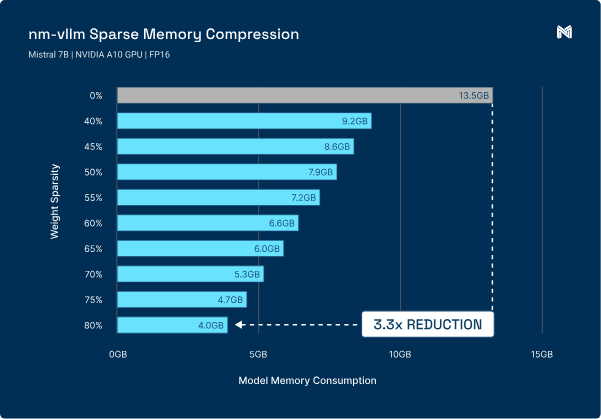

---



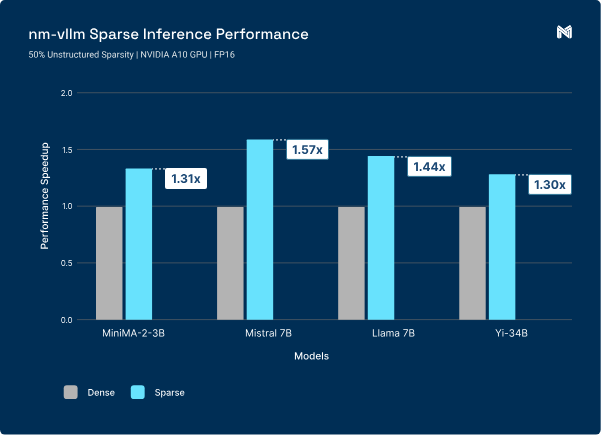

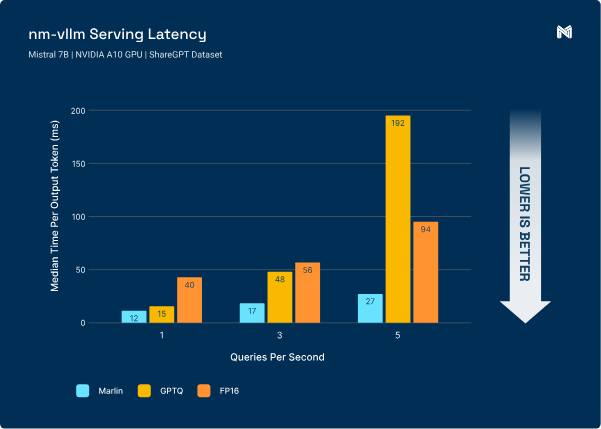

## **Code**

In [1]:
# install deps
!pip install -U nm-vllm[sparse] transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!nvidia-smi

Tue Apr  9 03:12:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0              50W / 400W |  16749MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [4]:
from huggingface_hub import notebook_login

notebook_login()

### **Inference on Mistal Sparse Model**

In [ ]:
from vllm import LLM, SamplingParams

# specify compressed kernel argument
llm = LLM(model="neuralmagic/OpenHermes-2.5-Mistral-7B-pruned50", sparsity="sparse_w16a16")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/635 [00:00<?, ?B/s]

INFO 03-13 03:27:46 llm_engine.py:81] Initializing an LLM engine with config: model='neuralmagic/OpenHermes-2.5-Mistral-7B-pruned50', tokenizer='neuralmagic/OpenHermes-2.5-Mistral-7B-pruned50', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=32768, download_dir=None, load_format=auto, tensor_parallel_size=1, disable_custom_all_reduce=False, quantization=None, sparsity=sparse_w16a16, enforce_eager=False, kv_cache_dtype=auto, device_config=cuda, seed=0)


tokenizer_config.json:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/449 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


INFO 03-13 03:27:54 weight_utils.py:177] Using model weights format ['*.bin']


pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

INFO 03-13 03:29:42 llm_engine.py:340] # GPU blocks: 11947, # CPU blocks: 2048
INFO 03-13 03:29:44 model_runner.py:676] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 03-13 03:29:44 model_runner.py:680] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enforcing eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO 03-13 03:29:51 model_runner.py:748] Graph capturing finished in 7 secs.


**Prompt Template:**

<|im_start|>user

{prompt}<|im_end|>

<|im_start|>assistant


In [2]:
def format_prompt(prompt):
  return f"<|im_start|>user\n{prompt}<|im_end|>\n<|im_start|>assistant"

prompts = [
    "The capital of the sun is",
    "You are self conscious?",
    "Akira Toriyama	is",
    "Yann LeCun is",
]

prompts = [format_prompt(prompt) for prompt in prompts]

In [ ]:
sampling_params = SamplingParams(max_tokens=100, temperature=0.8, top_p=0.95)

outputs = llm.generate(prompts, sampling_params)

# Print the outputs.
for output in outputs:
    prompt = output.prompt
    generated_text = output.outputs[0].text
    print(f"\nGenerated text: {prompt}{generated_text}\n")


Processed prompts: 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]


Generated text: The capital of the sun is the most populated city in France. Paris is famous worldwide for its historic buildings, fashion, and food, but it has more than that. The city is known for its art scene with the Louvre museum being one of the world’s largest museums.

Paris is a city that offers something for everyone. If you are interested in art, fashion, cuisine, and architecture Paris is perfect. Paris has many attractions such as Notre Dame, Eiffel Tower


Generated text: You are self conscious? Fine. But don’t let yourself be overwhelmed. You are unique, you are not like anyone else. That’s fine. The only thing you need to do is to present yourself uniquely. You are unique, so present yourself uniquely.

Think about your uniqueness. You have something that no one else has. Your uniqueness is what makes you special and it’s what makes you a unique individual. You have something that no one else has, so you must


Generated text: Akira Toriyama	is a Japanese manga artist

In [ ]:
llm.generate('O Brasil é o maior campeão', sampling_params)

Processed prompts: 100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


[RequestOutput(request_id=37, prompt='O Brasil é o maior campeão', prompt_token_ids=[1, 451, 18341, 1233, 289, 8212, 271, 3730, 386, 2069], prompt_logprobs=None, outputs=[CompletionOutput(index=0, text=' do mundo, com 20 títulos, com um desempenho um pouco mais que um desempenho de qualidade de mais de 300 millares de dólaros. Esse título, como o seu, é compridado em metros.\n\n**COMPROMISSO SOLIDO**\n\n**Parece que o Brasil, que tem a maior economia de mundo, tem poucos problem', token_ids=[511, 18654, 28725, 432, 28705, 28750, 28734, 261, 4071, 23235, 28725, 432, 3205, 634, 366, 2748, 2124, 3205, 8631, 1115, 5359, 955, 3205, 634, 366, 2748, 2124, 340, 4109, 8669, 340, 5359, 340, 28705, 28770, 28734, 28734, 2545, 4585, 340, 281, 9185, 283, 385, 28723, 6177, 331, 261, 4071, 10010, 28725, 3118, 289, 7987, 28725, 1233, 623, 3361, 1452, 877, 1424, 2737, 28723, 13, 13, 348, 9028, 1594, 5877, 1383, 28762, 318, 3064, 1138, 28762, 348, 13, 13, 348, 28753, 492, 358, 955, 289, 18341, 28725, 955

In [ ]:
# Cleanup
# restart session if not work
del llm
import gc
gc.collect()

0

Inference via vLLM entrypoint (OpenAI compatible)

In [ ]:
!python -m vllm.entrypoints.openai.api_server \
    --model neuralmagic/OpenHermes-2.5-Mistral-7B-pruned50 --sparsity sparse_w16a16

INFO 03-13 03:48:53 api_server.py:229] args: Namespace(host=None, port=8000, allow_credentials=False, allowed_origins=['*'], allowed_methods=['*'], allowed_headers=['*'], api_key=None, served_model_name=None, lora_modules=None, chat_template=None, response_role='assistant', ssl_keyfile=None, ssl_certfile=None, root_path=None, middleware=[], model='neuralmagic/OpenHermes-2.5-Mistral-7B-pruned50', tokenizer=None, revision=None, code_revision=None, tokenizer_revision=None, tokenizer_mode='auto', trust_remote_code=False, download_dir=None, load_format='auto', dtype='auto', kv_cache_dtype='auto', max_model_len=None, worker_use_ray=False, pipeline_parallel_size=1, tensor_parallel_size=1, max_parallel_loading_workers=None, block_size=16, seed=0, swap_space=4, gpu_memory_utilization=0.9, max_num_batched_tokens=None, max_num_seqs=256, max_paddings=256, disable_log_stats=False, quantization=None, sparsity='sparse_w16a16', enforce_eager=False, max_context_len_to_capture=8192, disable_custom_all_r

### **Quantize a Sparse Model with AutoGPTQ and Marlin Kernels**

In [ ]:
!pip install auto-gptq==0.7.1 torch==2.2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 91.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.2 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 2.1.0
    Uninstalling

In [ ]:
import argparse, gc, shutil
from transformers import AutoTokenizer
from auto_gptq import AutoGPTQForCausalLM, BaseQuantizeConfig
from datasets import load_dataset

model_id = "neuralmagic/OpenHermes-2.5-Mistral-7B-pruned50"
max_seq_len = 2048
num_samples = 512

def preprocess(example):
    return {"text": tokenizer.apply_chat_template(example["messages"], tokenize=False)}

dataset = load_dataset("HuggingFaceH4/ultrachat_200k", split="train_sft[:5%]")
tokenizer = AutoTokenizer.from_pretrained(model_id)

ds = dataset.shuffle().select(range(num_samples))
ds = ds.map(preprocess)

examples = [
    tokenizer(
        example["text"], padding=False, max_length=max_seq_len, truncation=True,
    ) for example in ds
]

quantize_config = BaseQuantizeConfig(
    bits=4,                         # Only support 4 bit
    group_size=-1,                  # Set to g=128 or -1 (for channelwise)
    desc_act=False,                 # Marlin does not suport act_order=True
    model_file_base_name="model"    # Name of the model.safetensors when we call save_pretrained
)

model = AutoGPTQForCausalLM.from_pretrained(
    model_id,
    quantize_config,
    device_map="auto"
)
model.quantize(examples)

gptq_save_dir = "./tmp-gptq"
print(f"Saving gptq model to {gptq_save_dir}")
model.save_pretrained(gptq_save_dir)
tokenizer.save_pretrained(gptq_save_dir)

del model
gc.collect()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train_sft split:   0%|          | 0/207865 [00:00<?, ? examples/s]

Generating test_sft split:   0%|          | 0/23110 [00:00<?, ? examples/s]

Generating train_gen split:   0%|          | 0/256032 [00:00<?, ? examples/s]

Generating test_gen split:   0%|          | 0/28304 [00:00<?, ? examples/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Map:   0%|          | 0/512 [00:00<?, ? examples/s]

pytorch_model.bin.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

INFO - Start quantizing layer 1/32
INFO:auto_gptq.modeling._base:Start quantizing layer 1/32
INFO - Quantizing self_attn.k_proj in layer 1/32...
INFO:auto_gptq.modeling._base:Quantizing self_attn.k_proj in layer 1/32...
INFO - Quantizing self_attn.v_proj in layer 1/32...
INFO:auto_gptq.modeling._base:Quantizing self_attn.v_proj in layer 1/32...
INFO - Quantizing self_attn.q_proj in layer 1/32...
INFO:auto_gptq.modeling._base:Quantizing self_attn.q_proj in layer 1/32...
INFO - Quantizing self_attn.o_proj in layer 1/32...
INFO:auto_gptq.modeling._base:Quantizing self_attn.o_proj in layer 1/32...
INFO - Quantizing mlp.up_proj in layer 1/32...
INFO:auto_gptq.modeling._base:Quantizing mlp.up_proj in layer 1/32...
INFO - Quantizing mlp.gate_proj in layer 1/32...
INFO:auto_gptq.modeling._base:Quantizing mlp.gate_proj in layer 1/32...
INFO - Quantizing mlp.down_proj in layer 1/32...
INFO:auto_gptq.modeling._base:Quantizing mlp.down_proj in layer 1/32...
INFO - Start quantizing layer 2/32
INFO:

Saving gptq model to ./tmp-gptq


1218

In [ ]:
# apply marlin kernels
save_sparse_marlin_dir = "openhermes-pruned50-marlin"

marlin_model = AutoGPTQForCausalLM.from_quantized(
    gptq_save_dir,
    use_marlin=True,
    device_map="auto")

print("Saving in marlin format")
marlin_model.save_pretrained(save_sparse_marlin_dir)
tokenizer.save_pretrained(save_sparse_marlin_dir)

#shutil.rmtree(gptq_save_dir)

WARNING - ignoring unknown parameter in quantize_config.json: quant_method.
INFO - The layer lm_head is not quantized.
INFO:auto_gptq.modeling._base:The layer lm_head is not quantized.
Repacking weights to be compatible with Marlin kernel...: 100%|██████████| 454/454 [00:41<00:00, 11.02it/s]
WARNING - you are using save_pretrained, which will re-direct to save_quantized.


Saving in marlin format


In [ ]:
# Upload the output model to Hugging Face Hub
import os
from huggingface_hub import HfApi

hf_username = "vilsonrodrigues" # "YOUR_HF_USER"

final_model_name = os.path.join(hf_username, "OpenHermes-2.5-Mistral-7B-Pruned50-GPTQ-Marlin")

HfApi().create_repo(final_model_name)

HfApi().upload_folder(
    folder_path=save_sparse_marlin_dir,
    repo_id=final_model_name,
)

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/4.02G [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/vilsonrodrigues/OpenHermes-2.5-Mistral-7B-Pruned50-GPTQ-Marlin/commit/bf472a75af965640047db60b7af653a1f3bff77e', commit_message='Upload folder using huggingface_hub', commit_description='', oid='bf472a75af965640047db60b7af653a1f3bff77e', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
# Try my checkpoint
!python -m vllm.entrypoints.openai.api_server \
    --model vilsonrodrigues/OpenHermes-2.5-Mistral-7B-Pruned50-GPTQ-Marlin --sparsity sparse_w16a16

### **Sparcify (Prune) Models**

Requires a NVIDIA GPU with compute capability >= 8.0 (>=Ampere) because of Marlin kernel and semistructured sparse  restrictions. This will not run on T4 or V100.

In [2]:
!pip install sparseml-nightly==1.7.0.20240304 sparseml[transformers]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.8/450.8 kB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.3/297.3 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19

In [1]:
import sparseml.transformers

original_model_name = "NousResearch/Hermes-2-Pro-Mistral-7B"
calibration_dataset = "open_platypus"
output_directory = "output_sparse_model/"

recipe = """
test_stage:
  obcq_modifiers:
    SparseGPTModifier:
      sparsity: 0.5
      sequential_update: true
      targets: ['re:model.layers.\d*$']
"""

# Apply SparseGPT to the model
sparseml.transformers.oneshot(
    model=original_model_name,
    dataset=calibration_dataset,
    recipe=recipe,
    output_dir=output_directory,
)

2024-04-09 02:39:39 sparseml.transformers.finetune.text_generation WARNING  Process rank: 0, device: cuda:0, n_gpu: 1, distributed training: True, 16-bits training: False


2024-04-09 02:39:39 sparseml.transformers.finetune.text_generation WARNING  Moving NousResearch/Hermes-2-Pro-Mistral-7B to device cuda:0 for One-Shot


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

2024-04-09 02:46:29 sparseml.transformers.utils.helpers INFO     model_path is a huggingface model id. Attempting to download recipe from https://huggingface.co/
INFO:sparseml.transformers.utils.helpers:model_path is a huggingface model id. Attempting to download recipe from https://huggingface.co/
2024-04-09 02:46:29 sparseml.transformers.utils.helpers INFO     Found recipe: recipe.yaml for model id: NousResearch/Hermes-2-Pro-Mistral-7B. Downloading...
INFO:sparseml.transformers.utils.helpers:Found recipe: recipe.yaml for model id: NousResearch/Hermes-2-Pro-Mistral-7B. Downloading...
2024-04-09 02:46:31 sparseml.transformers.utils.helpers INFO     Unable to to find recipe recipe.yaml for model id: NousResearch/Hermes-2-Pro-Mistral-7B: 404 Client Error. (Request ID: Root=1-6614ac05-68068cb17c9073095f4d8a15;f9d7285b-9b6f-4a95-a266-7d4a5dc14ab8)

Entry Not Found for url: https://huggingface.co/NousResearch/Hermes-2-Pro-Mistral-7B/resolve/main/recipe.yaml.. Skipping recipe resolution.
INF

[WARNING|logging.py:290] 2024-04-09 02:46:34,337 >> Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
[WARNING|logging.py:290] 2024-04-09 02:46:34,641 >> Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Logging all SparseML modifier-level logs to sparse_logs/09-04-2024_02.46.34.log
2024-04-09 02:46:34 sparseml.core.logger.logger INFO     Logging all SparseML modifier-level logs to sparse_logs/09-04-2024_02.46.34.log
INFO:sparseml.core.logger.logger:Logging all SparseML modifier-level logs to sparse_logs/09-04-2024_02.46.34.log


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/24926 [00:00<?, ? examples/s]

Restructuring Platypus Dataset:   0%|          | 0/24926 [00:00<?, ? examples/s]

Running tokenizer on dataset:   0%|          | 0/24926 [00:00<?, ? examples/s]

Adding labels:   0%|          | 0/24926 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(
2024-04-09 02:47:10 sparseml.transformers.finetune.runner INFO     *** One Shot ***
INFO:sparseml.transformers.finetune.runner:*** One Shot ***


{'train': ['input_ids', 'attention_mask', 'labels']}


2024-04-09 02:47:11 sparseml.core.recipe.recipe WARNING  Could not process input as a file path or zoo stub, attempting to process it as a string.
2024-04-09 02:47:11 sparseml.core.recipe.recipe WARNING  Input string: 
test_stage:
  obcq_modifiers:
    SparseGPTModifier:
      sparsity: 0.5
      sequential_update: true
      targets: ['re:model.layers.\d*$']

test_stage:
  obcq_modifiers:
    SparseGPTModifier:
      sparsity: 0.5
      sequential_update: true
      targets: ['re:model.layers.\d*$']

2024-04-09 02:47:11 sparseml.modifiers.pruning.wanda.pytorch INFO     Preparing model.layers.0 for compression
INFO:sparseml.modifiers.pruning.wanda.pytorch:Preparing model.layers.0 for compression
2024-04-09 02:47:11 sparseml.modifiers.pruning.wanda.pytorch INFO     Preparing model.layers.1 for compression
INFO:sparseml.modifiers.pruning.wanda.pytorch:Preparing model.layers.1 for compression
2024-04-09 02:47:11 sparseml.modifiers.pruning.wanda.pytorch INFO     Preparing model.layers.2 fo

In [2]:
!ls -alh output_sparse_model

total 14G
drwxr-xr-x 2 root root 4.0K Apr  9 03:10 .
drwxr-xr-x 1 root root 4.0K Apr  9 02:47 ..
-rw-r--r-- 1 root root  643 Apr  9 03:10 added_tokens.json
-rw-r--r-- 1 root root  663 Apr  9 03:09 config.json
-rw-r--r-- 1 root root  141 Apr  9 03:09 generation_config.json
-rw-r--r-- 1 root root 9.3G Apr  9 03:10 pytorch_model-00001-of-00002.bin
-rw-r--r-- 1 root root 4.3G Apr  9 03:10 pytorch_model-00002-of-00002.bin
-rw-r--r-- 1 root root  24K Apr  9 03:10 pytorch_model.bin.index.json
-rw-r--r-- 1 root root  143 Apr  9 03:10 recipe.yaml
-rw-r--r-- 1 root root  557 Apr  9 03:10 special_tokens_map.json
-rw-r--r-- 1 root root 6.7K Apr  9 03:10 tokenizer_config.json
-rw-r--r-- 1 root root 1.8M Apr  9 03:10 tokenizer.json
-rw-r--r-- 1 root root 482K Apr  9 03:10 tokenizer.model


In [5]:
# Upload the output model to Hugging Face Hub
import os
from huggingface_hub import HfApi

hf_username = "vilsonrodrigues" # "YOUR_HF_USER"

final_model_name = os.path.join(hf_username, "Hermes-2-Pro-Mistral-7B-Pruned50")

HfApi().create_repo(final_model_name)

HfApi().upload_folder(
    folder_path=output_directory,
    repo_id=final_model_name,
)

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

'https://huggingface.co/vilsonrodrigues/Hermes-2-Pro-Mistral-7B-Pruned50/tree/main/'

In [ ]:
# Try my checkpoint
!python -m vllm.entrypoints.openai.api_server \
    --model vilsonrodrigues/Hermes-2-Pro-Mistral-7B-Pruned50 --sparsity sparse_w16a16